This guided programing lab would ideally fit after the AP exam of a AP-Physics 2 (or 1 class that had students who all (or mostly) took AP Chemsistry).  This module leans heavily on the knowledge that would be gained in the light unit, regarding wavelength and dopler shift (As written this doesn't rely on Doppler shift as the "raw" data has already been dopler shifted, but that can be undone easily).  The underlying scientific data relys on the measuring the energy emited from methane as it energy drops from excited states.  As currently written, this module only requires a student to run each of the following cells, but could be obvuscated to require students "correct the incorect code" at each step.  

When you get to the. end the peaks in the data are slightly offset from the expected values, this is because of a doppler shift caused by the relative shifting between Saturn and Earth.  The measured lines are also wider than the expected values.  This is partly caused by temerature and pressure varriations on Titan as well as Titan's rotation.

By the time I would actually use this, Brendan and his new team has telescope time on James Webb, which will get a significantly better data set, free from the interfearance of earths atmosphere.  So as cool as this is... BETER STUFF IS COMMING!

#Introduction

Titan is the largest moon in our solar system and is in orbit around the planet Saturn.  
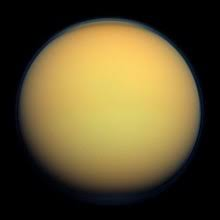

It is also the only moon in our solar system that has an atmosphere.  Today you will be analyzing the atmosphere using data taken from IRTF (NASA Infrared Telescope Facility) using TEXES (Texas Echelon Cross Echelle Spectrograph, by Dr. Brendan Steffens, a planetary scientist fellow in the NASA postdoctoral program at the Goddard Space Flight Center.

If you want to know all the details about the instrument and telescope, the scientific paper describing it is[TEXES: A Sensitive High‐Resolution Grating Spectrograph for the Mid‐Infrared](https://iopscience.iop.org/article/10.1086/338730).


You will also be using Jupiter's Callisto as a "control" for the instrument.  As a moon that is large, not geologically active, and does not have an atmosphere, it ideal for helping us determine which parts of the data are reliably coming form Tita's atmoshpere, and which are actually contributions from Earth's atmosphere getting in the way.

In [ ]:
#Start by running this cell to load all of the python packages you will need to complete the analysis.
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
#And import the data
rawdata = pd.read_csv('https://github.com/GravityCubed/QuarkNet/raw/main/SaturnMoonSpectrum.csv')

In [ ]:
#You have now imported the raw data as it would come from the TEXES Spectrograph.
#As it contains over 2,000 data points for each moon it isn't feasable to look at the whole thing
#but you can look at the top lines by asking python to print the head of the file
rawdata.head(3)

,Callisto_Wave_Number,Callisto_Spectrum,Callisto_Noise,Titan_Wave_Number,Titan_Spectrum,Titan_Noise
0,1243.029331,0.0,0.0,1243.029087,0.0,0.0
1,1243.033477,0.0,0.0,1243.033233,0.0,0.0
2,1243.037623,0.0,0.0,1243.037379,0.0,0.0


The Wave number is related to the wavelength of the infrared light.  It is how many wavelengths of the light can fit into a cm.  It is kind of an anoying to deal with so we translate that into a more usable form later.  The spectrum shows how strong the signal is at that particular wavelength, and the noise is the uncertainty of that measurement.  You might notice that for the first few data points these are both 0.  That is because those wavelengths are just outside what the detector recorded, and is not a reason to worry.  




In [ ]:
#Because we are dealing with mid-infrared wavelengths they are measured in micrometers.
#Make a new column called "Wavelength" and make it equal the  10,000/Wave Number
rawdata['Wavelength'] = 10000/rawdata['Callisto_Wave_Number']
rawdata.head(3)

,Callisto_Wave_Number,Callisto_Spectrum,Callisto_Noise,Titan_Wave_Number,Titan_Spectrum,Titan_Noise,Wavelength
0,1243.029331,0.0,0.0,1243.029087,0.0,0.0,8.044862
1,1243.033477,0.0,0.0,1243.033233,0.0,0.0,8.044836
2,1243.037623,0.0,0.0,1243.037379,0.0,0.0,8.044809


Text(0, 0.5, 'Spectrum')

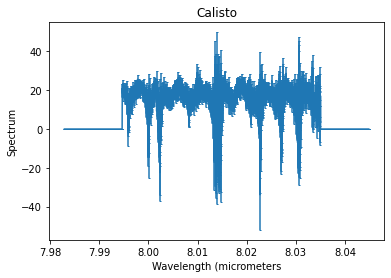

In [ ]:
#Generates an scatterplot of the spectrum data of Callisto
plt.errorbar(
#range=[1249,1250],
rawdata['Wavelength'],#xaxis
rawdata['Callisto_Spectrum'], #yaxis
yerr=rawdata['Callisto_Noise'],#yerror
xerr=None,
#fmt=”o",
ecolor=None,
elinewidth=None,
capsize=1,
barsabove=False,
lolims=False,
uplims=False,
xlolims=False,
xuplims=False,
errorevery=1,
capthick=None,

)
#plt.xlim(1250, 1250.1) #Uncomment to zoom in on part of the data
#plt.ylim(-2, 2)
plt.title('Calisto')
plt.xlabel('Wavelength (micrometers')
plt.ylabel('Spectrum')


Text(0, 0.5, 'Spectrum')

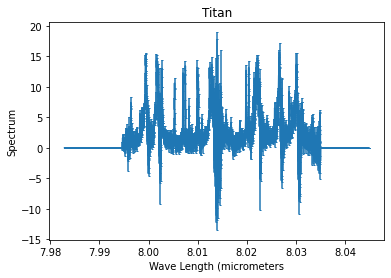

In [ ]:
#Generates an scatterplot of the spectrum data of Titan
plt.errorbar(
#range=[1249,1250],
rawdata['Wavelength'],#xaxis
rawdata['Titan_Spectrum'], #yaxis
yerr=rawdata['Titan_Noise'],#yerror
xerr=None,
#fmt=”o",
ecolor=None,
elinewidth=None,
capsize=1,
barsabove=False,
lolims=False,
uplims=False,
xlolims=False,
xuplims=False,
errorevery=1,
capthick=None,

)
#plt.xlim(1250, 1250.1) #Uncomment to zoom in on part of the data
#plt.ylim(-2, 2)
plt.title('Titan')
plt.xlabel('Wave Length (micrometers')
plt.ylabel('Spectrum')


You have now created two graphs that show interesting data for the two moons.  The problem is that you may recal that Callisto is supposed to be boring, because it has no atmosphere.  So why does it look like the light that Dr. Steffens recorded passed through an atmosphere?  While I am tempted to tease him about screwing up and looking at the wrong object in the night sky, a far more likely answer is that the atmosphere that was causing this signal was our own.

In fact if you look at how transparant Earth's atmosphere is based on the infrared wavelength, you may find similarities between the data taken looking at Callisto.  

Now would be a good time to go look at that.  Go to [ATRAN](https://atran.arc.nasa.gov/cgi-bin/atran/atran.cgi) (Atmospheric Transmission Simulator).

* IRTF altitude: 13779.53
* The IRTF is on the Big Island of Hawaii at a Latitude of 20 degrees, so choose either of the two options which is closest to that.
* Because it is above the cloud layer use 0 for water vapor overburden.
* Zenith angle: 45 degrees (this is an approximation for extended observations like ours, which lasted for several hours
* Wavelength range: time to practice that conversion to microns!!! ;)
* Smoothing factor R=0

Your next task will be to subtract the background caused by Earth's atmosphere from the Titan data, so it is more obvious what is on Titan, rather than on our own planet. First we will "normalize" the data from Callisto, making the Y-Axis go from -1 to 1.

In [ ]:
#Normalizes the Calisto spectrum on a scale of -1 to 1, and divides the titan data by the Callisto data
callistomax=max(rawdata['Callisto_Spectrum'])
rawdata['Callistio_Spectrum_Normalized'] = (rawdata['Callisto_Spectrum']/callistomax)
rawdata['Titan_Subtracted']= (rawdata['Titan_Spectrum']/rawdata['Callistio_Spectrum_Normalized'])
rawdata.head(3)

,Callisto_Wave_Number,Callisto_Spectrum,Callisto_Noise,Titan_Wave_Number,Titan_Spectrum,Titan_Noise,Wavelength,Callistio_Spectrum_Normalized,Titan_Subtracted
0,1243.029331,0.0,0.0,1243.029087,0.0,0.0,8.044862,0.0,NaN
1,1243.033477,0.0,0.0,1243.033233,0.0,0.0,8.044836,0.0,NaN
2,1243.037623,0.0,0.0,1243.037379,0.0,0.0,8.044809,0.0,NaN


Text(0, 0.5, 'Spectrum')

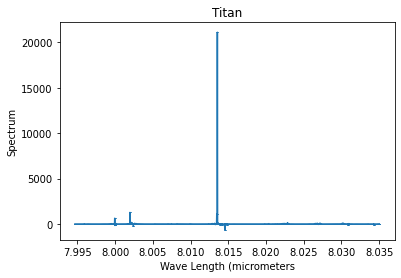

In [ ]:
#Generates an scatterplot of the spectrum data of Titan
plt.errorbar(
#range=[1249,1250],
rawdata['Wavelength'],#xaxis
rawdata['Titan_Subtracted'], #yaxis
yerr=rawdata['Titan_Noise'],#yerror
xerr=None,
#fmt=”o",
capsize=1

)
#plt.xlim(1250, 1250.1) #Uncomment to zoom in on part of the data
#plt.ylim(-100, 100)
plt.title('Titan')
plt.xlabel('Wave Length (micrometers')
plt.ylabel('Spectrum')

We now have a graph!  Unfortunately the huge spikes are more than likely caused by artifacts caused by dividing one set of data by another.  So we need to apply another filter.  If you look again at the Atmospheric Transmission Simulator data you generated, there are wavelengths that are completely opaque, and they may line up with those artifacts.  If the Earth is more than 50% opaque, the data from those regions is highly problematic (a nice way of saying almost useless).  Look at the ATRAN data and exclude that data using the code below.  It may be helpful to look at the raw data,

In [ ]:
#titanfiltereddata = rawdata.query('Wavelength<7.99578810 or  Wavelength in range(7.99609041, 7.99969387')
titanfiltereddata = rawdata.query('(Wavelength<7.99578810) or  (Wavelength>7.99609041 and Wavelength<7.99969387) or (Wavelength>8.00027847 and Wavelength<8.00184917) or (Wavelength>8.00279713 and Wavelength<8.00826359)or (Wavelength>8.00840473 and Wavelength<8.01307011) or (Wavelength>8.01519299 and Wavelength<8.02085876) or (Wavelength>8.02089977 and Wavelength<8.02237797) or (Wavelength>8.02316856 and Wavelength<8.02675533) or (Wavelength>8.02758694 and Wavelength<8.03020477) or (Wavelength>8.03121948 and Wavelength<8.03997898)')
# shows some descriptive statistics for a column in your dataframe
titanfiltereddata['Wavelength'].describe()

count    1889.000000
mean        8.010805
std         0.017017
min         7.982898
25%         7.995390
50%         8.009915
75%         8.025481
max         8.039955
Name: Wavelength, dtype: float64

Text(0, 0.5, 'Spectrum')

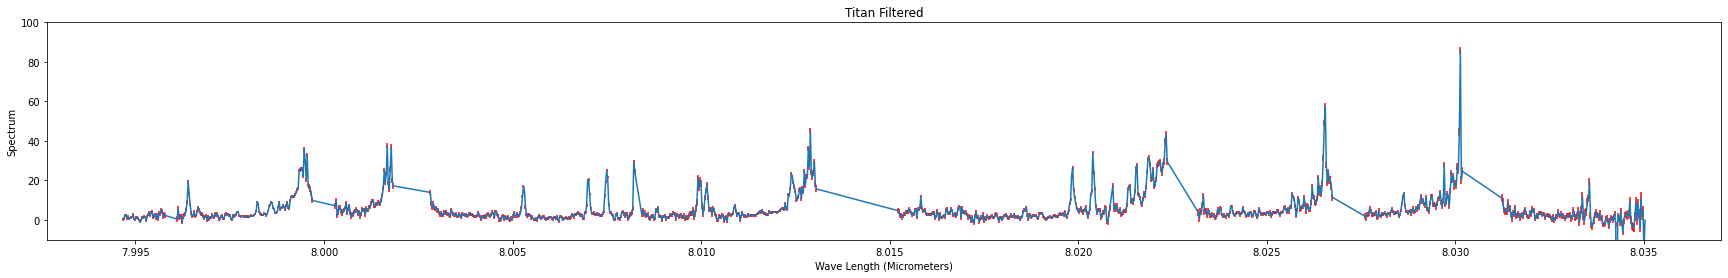

In [ ]:
#Generates an scatterplot of the spectrum data of Titan
plt.figure(figsize=(30,4))
plt.errorbar(
#range=[1249,1250],
titanfiltereddata['Wavelength'],#xaxis
titanfiltereddata['Titan_Subtracted'], #yaxis
yerr=titanfiltereddata['Titan_Noise'],#yerror
xerr=None,
#fmt=”o",
ecolor='#FF0000')

#plt.xlim(1250, 1250.1) #Uncomment to zoom in on part of the data
plt.ylim(-10, 100)
plt.title('Titan Filtered')
plt.xlabel('Wave Length (Micrometers)')
plt.ylabel('Spectrum')

Now that you have successfully made the plot of the light that is actually arriving from Titan, you can now compare that data to to the spectral fingerprint of methane.  [HITRAN](https://www.hitran.org) is the High-Resolution Transmission Molecular Absorption Database, and maintains the records of the wavelengths of light molocules emit when they change from an excited state to a lower state, similar to how atoms give off light that you studied in chemistry.  If you want to get your own account there to look for other elements and isotopes you can, but I have provided you the link for Methane below.

In [ ]:
methanedata = pd.read_csv('https://github.com/GravityCubed/QuarkNet/raw/main/MethaneData.csv')
methanedata['Wavelength'] = 10000/methanedata['Wave_Number']-.001
methanedata['Intensity_Normalized'] = methanedata['Intensity ']/max(methanedata['Intensity '])

Text(0, 0.5, 'Spectrum')

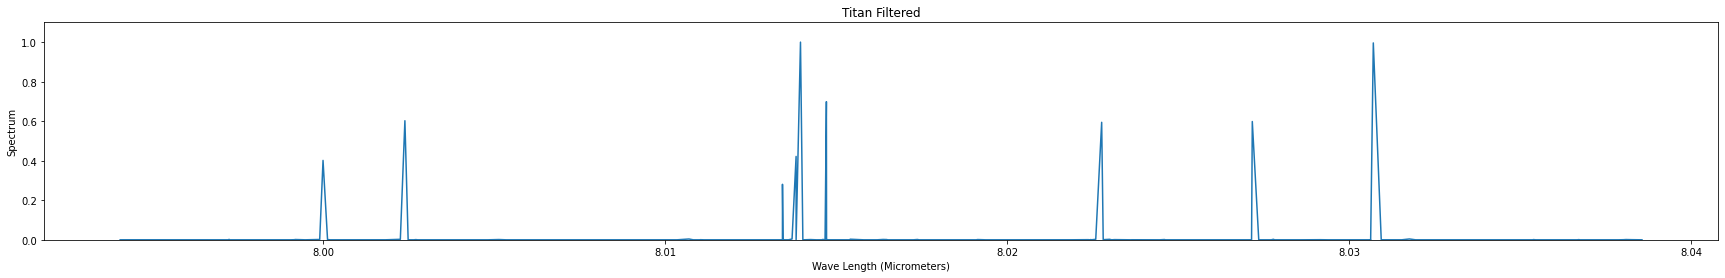

In [ ]:
#Generates an scatterplot of the spectrum data of Methane
plt.figure(figsize=(30,4))
plt.errorbar(
#range=[1249,1250],
methanedata['Wavelength'],#xaxis
methanedata['Intensity_Normalized'], #yaxis
#yerr=titanfiltereddata['Titan_Noise'],#yerror
xerr=None,
#fmt=”o",
ecolor='#FF0000')

#plt.xlim(1250, 1250.1) #Uncomment to zoom in on part of the data
plt.ylim(0, 1.1)
plt.title('Titan Filtered')
plt.xlabel('Wave Length (Micrometers)')
plt.ylabel('Spectrum')

Now that we have

[Text(0, 0.5, 'Spectrum'),
 Text(0.5, 0, 'Wave Length (Micrometers)'),
 Text(0.5, 1.0, 'Titan Filtered')]

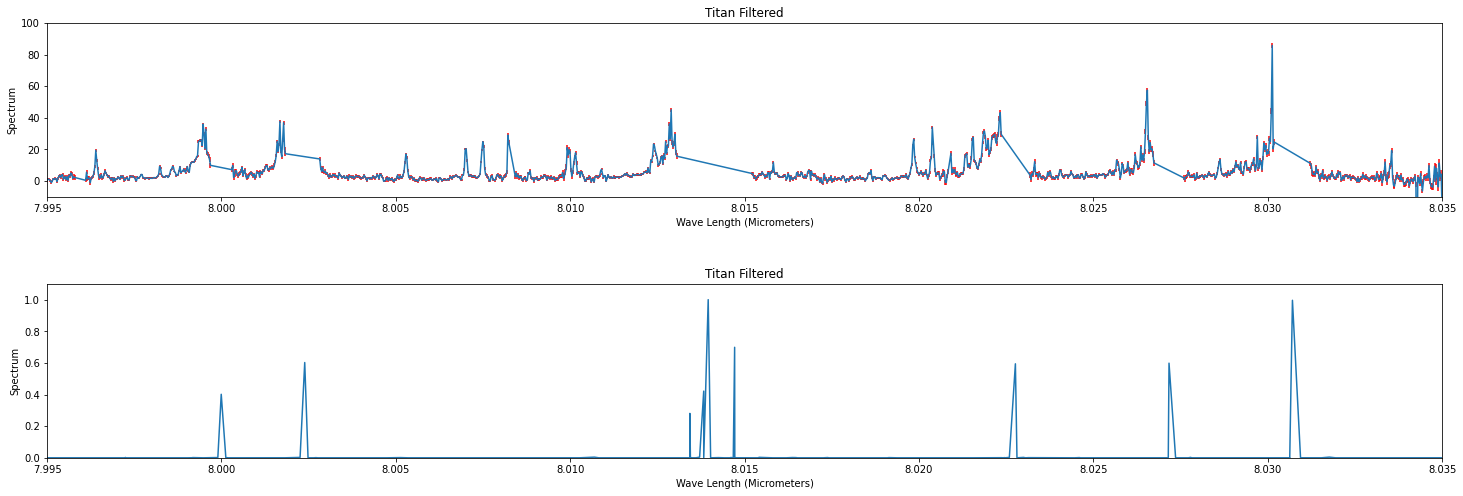

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(25,8))
fig.subplots_adjust(hspace=0.5)
#Generates an scatterplot of the spectrum data of Titan
ax[0].errorbar(
titanfiltereddata['Wavelength'],#xaxis
titanfiltereddata['Titan_Subtracted'], #yaxis
yerr=titanfiltereddata['Titan_Noise'],#yerror
xerr=None,
#fmt=”o",
ecolor='#FF0000')
ax[0].set_ylim(-10, 100)
ax[0].set_xlim(7.995,8.035)
ax[0].set(title='Titan Filtered',xlabel='Wave Length (Micrometers)',ylabel='Spectrum')


#Generates an scatterplot of the spectrum data of Methane
ax[1].errorbar(
methanedata['Wavelength'],#xaxis
methanedata['Intensity_Normalized'], #yaxis
ecolor='#00FF00')
ax[1].set_ylim(0, 1.1)
ax[1].set_xlim(7.995,8.035)
ax[1].set(title='Titan Filtered', xlabel='Wave Length (Micrometers)',ylabel='Spectrum')




You will notice that there is a slight offset between the peaks in your data and the expected peaks of methane.  This is because we didn't adjust for the Doppler effect, but you can see that all the peaks would line up if shifted by a little less than 1nm.

As an additional sign that you did good work, the graph of the red error bars is the analyissis that Steffans performed and the blue is very similar to what you created (just ploted with wavenumber rather than wavelength.
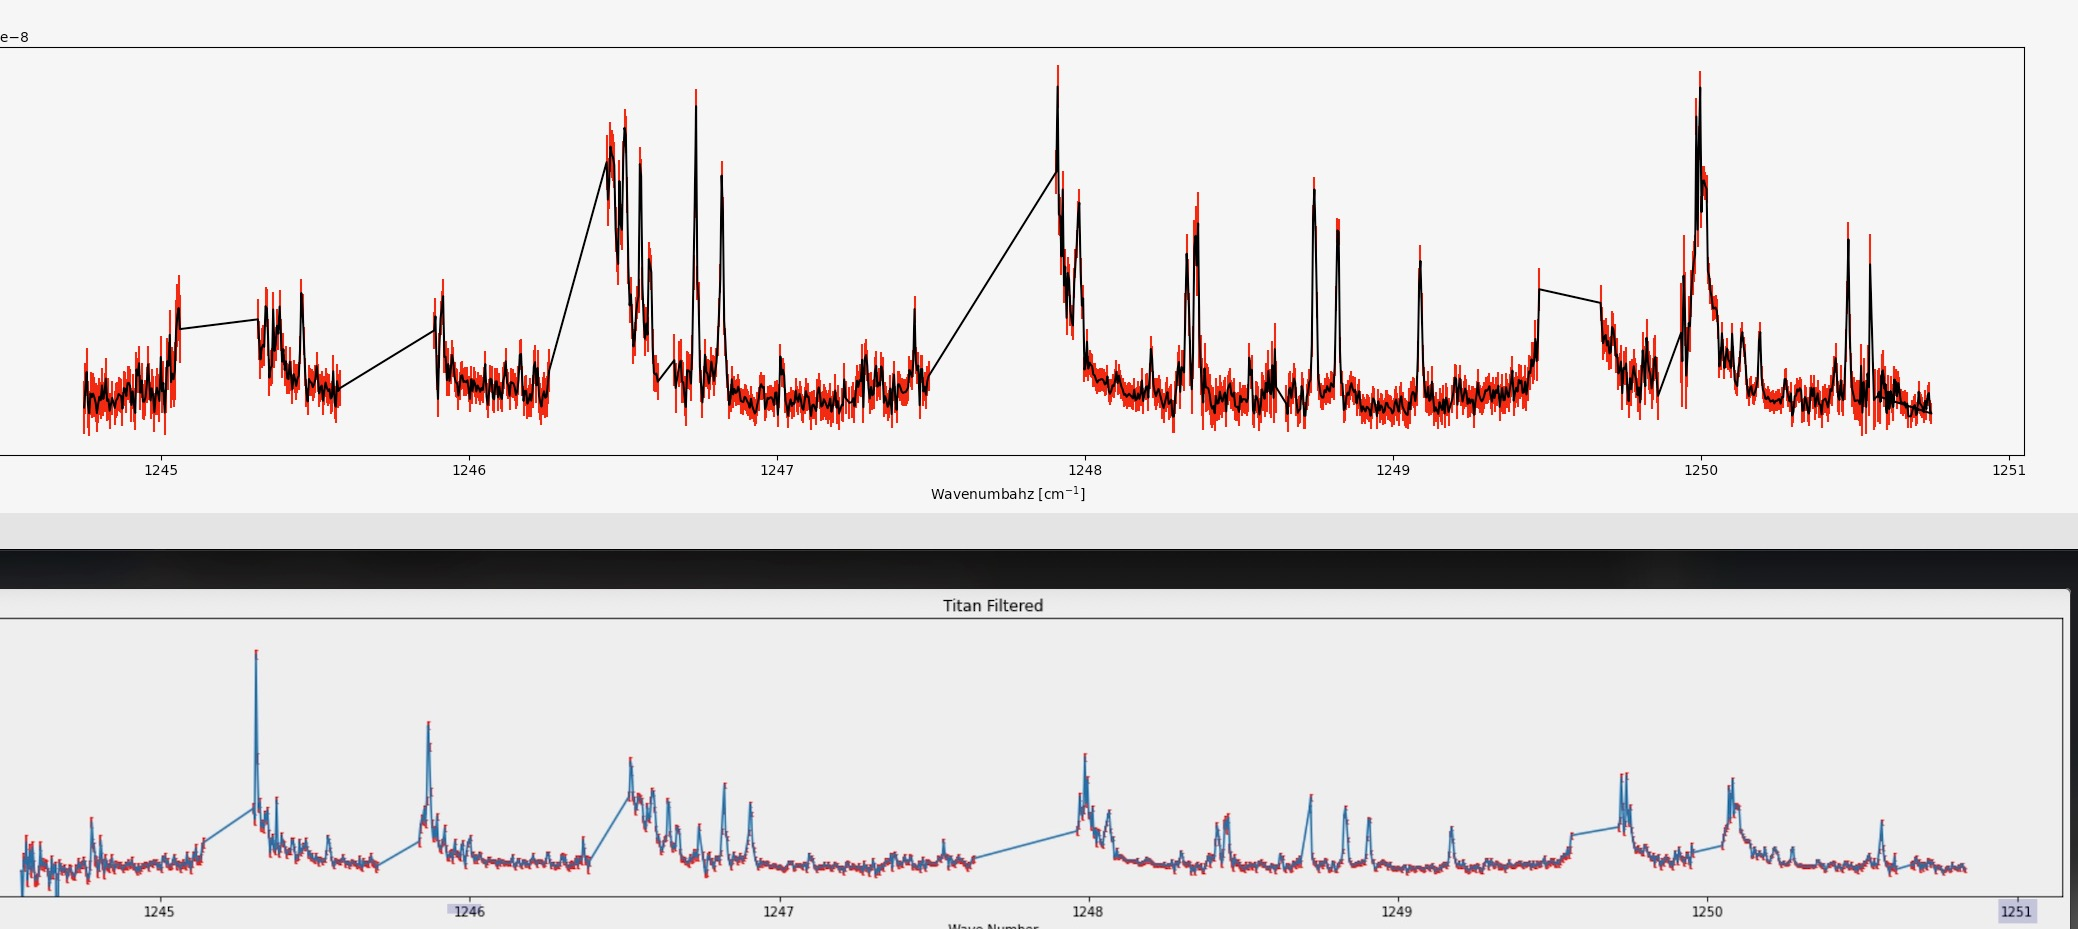